# Statistical Analysis
In this notebook lets do a statistical anaylysis of the Breast Cancer Wisconsin (Diagnostic) Data Set.

Using Python 3 and some analytics libraries, lets import them and the data.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools import plotting
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('max_columns', None)

data = pd.read_csv('Data\Breast Cancer Data.csv')
print('Data Imported')

FileNotFoundError: File b'Data\\Breast Cancer Data.csv' does not exist

First things first check the columns and drop any unnecessary columns before proceeding

In [12]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Unnamed: 32** seems garbage column, check it and drop it if it really is else rename it accordingly using the data description provided along with the data set. Similarly we need a **id** column as well as it doesnt represent a class or anything.

In [13]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.shape

(569, 31)

In [15]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Descriptive Statistics 
lets get an idea about the each coumns with `describe()` method

In [16]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Histogram
We use histograms to usually get the distribution of a varaible which shows frequency of each value.

Text(0.5,1,'Histogram of Radium Mean for Benign and Malignant Tumors')

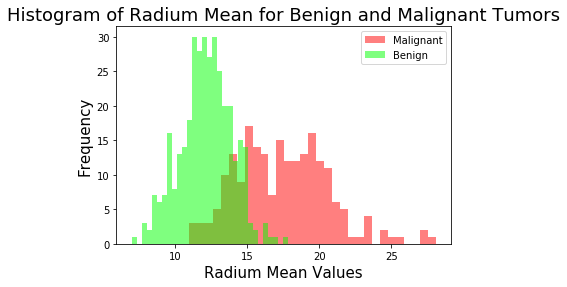

In [23]:
m = plt.hist(data[data['diagnosis'] == 'M'].radius_mean, bins=31, fc=(1, 0, 0, 0.5), label='Malignant')
b = plt.hist(data[data['diagnosis'] == 'B'].radius_mean, bins=31, fc=(0, 1, 0, 0.5), label='Benign')
plt.legend()
plt.xlabel('Radium Mean Values', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Radium Mean for Benign and Malignant Tumors', fontsize=18)



In [18]:
freq_malignant_radium_mean = m[0].max()
index_freq_malignant_radium_mean = list(m[0]).index(freq_malignant_radium_mean)
most_freq_malignant_radium_mean = m[1][index_freq_malignant_radium_mean]
print('Most Frequent malignant radium mean is: ', most_freq_malignant_radium_mean)

Most Frequent malignant radium mean is:  14.824838709677419


We can deduce that,
- Radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
- The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)

## Outliers
Usually values which are rare events or errors correspond to outliers and can easily be deduced from `scatter plots` or `box plots`. But the statistical approach to removing outliers is to set coundaries and remove values which are outside these boundaries.

Calculating Outliers,
- Calculate first quartile (Q1)(25%)
- Find IQR(inter quartile range) = Q3-Q1
- Compute Q1 - 1.5\*IQR and Q3 + 1.5\*IQR

Anything outside this range is an outlier.

In [25]:
data_benign = data[data['diagnosis'] == 'B']
data_malignant = data[data['diagnosis'] == 'M']

desc = data_benign.radius_mean.describe()
desc

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [57]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Range of sensible points we are looking for radium_mean feature: ({0:.3f}, {1})'.format(lower_bound, upper_bound))

Range of sensible points we are looking for radium_mean feature: (7.645, 16.805)


In [58]:
print("Outliers: ", data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

Outliers:  [ 6.981 16.84  17.85 ]


## Box Plots
This is also used to check outliers.

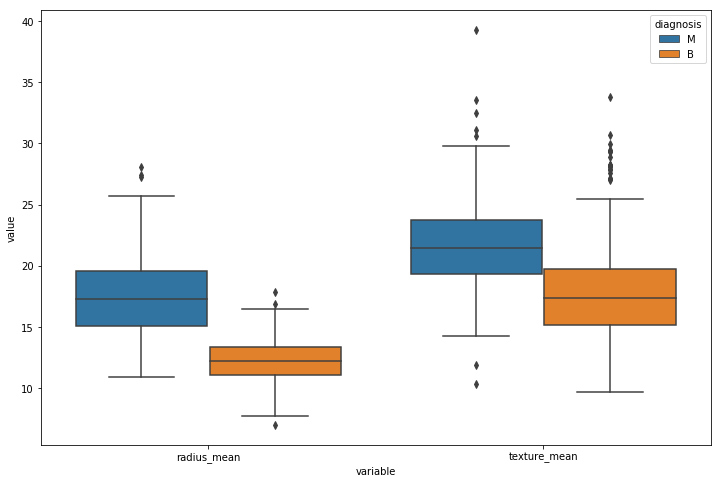

In [49]:
melted_data = pd.melt(data, id_vars='diagnosis', value_vars=['radius_mean', 'texture_mean'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='diagnosis', data=melted_data)

We found 3 outlier in benign radius_mean from our calculation and in box plot there are 3 outlier which shows it. We can evade this both ways and use a interactive plot like plotly to directly know the points and pick them out.

## Statistics Summary
We need to note down the follwing metrics of every feature, in-case we need them
- Mean
- Varaince: spread of the distribution
- Standard Deviation: sqrt of variance

In [52]:
print('Mean', data_benign.radius_mean.mean())
print('Variance', data_benign.radius_mean.var())
print('Standard Deviation(std)', data_benign.radius_mean.std())
print('Describe Method:\n', data_benign.radius_mean.describe())

Mean 12.146523809523808
Variance 3.1702217220438738
Standard Deviation(std) 1.7805116461410393
Describe Method:
 count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


## Cumulative Distributive Function (CDF)
The probability that the variable takes a value less than or equal to x. P(X <= x). We can plot a *CDF* in two ways.

Text(0.5,1,'CDF of Benign Tumor Radius Mean')

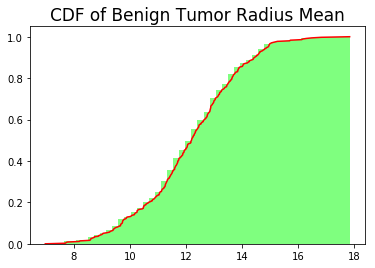

In [66]:
plt.hist(data_benign.radius_mean, bins=50, fc=(0, 1, 0, 0.5), label='Bening', normed=True, cumulative=True)
sorted_data = np.sort(data_benign.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, y, color='red')
plt.title('CDF of Benign Tumor Radius Mean', fontsize=17)

## Cohen's Effect Size

Cohen suggested that the `effective size` between two groups can be quantified and compared. Effect size emphasises the size of difference. If effect size is
- 0.2, it's a small effect size
- 0.5, it's a medium effect size 
- 0.8, it's a large effect size
- 1.2, very large
- 2.0, huge effect size!

It's calculated by mean difference between two groups divided by pooled standard deviation(square root of the pooled varaiances)

Let's compare size of effect between benign and malignant radius_means. 

In [68]:
mean_diff = data_malignant.radius_mean.mean() - data_benign.radius_mean.mean()
var_benign = data_benign.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_benign)*var_benign 
              + len(data_malignant)*var_malignant)/float(len(data_benign) + len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ", effect_size)

Effect size:  2.2048585165041414


Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other

## Corelation between Features
We can find this by a number a ways like heatmaps, scatter plots, regression plots, ANOVA, Pearson Correlation

<Figure size 720x432 with 0 Axes>

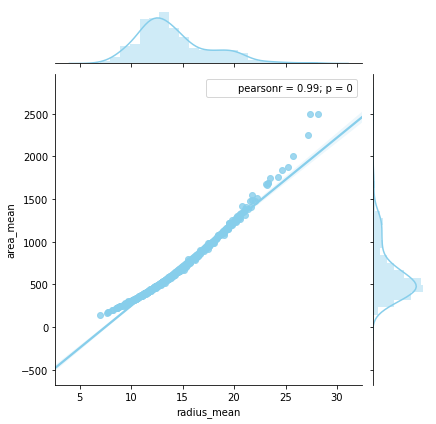

In [74]:
plt.figure(figsize=(10, 6))
sns.jointplot(data.radius_mean, data.area_mean, kind='regg', color='skyblue')


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


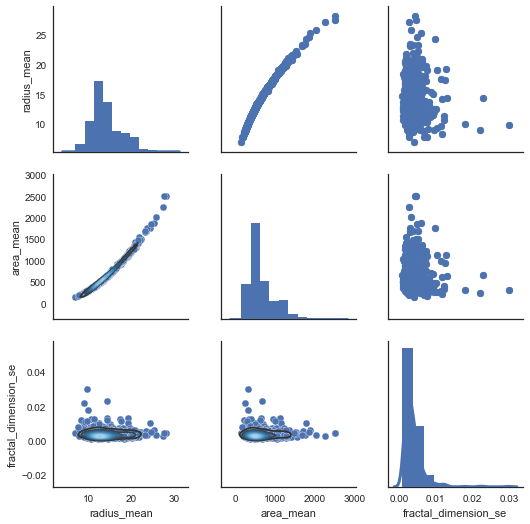

In [79]:
# We can even plot between more than 2 Features
sns.set(style='white')
df = data.loc[:, ['radius_mean', 'area_mean', 'fractal_dimension_se']]
g = sns.pairplot(df)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

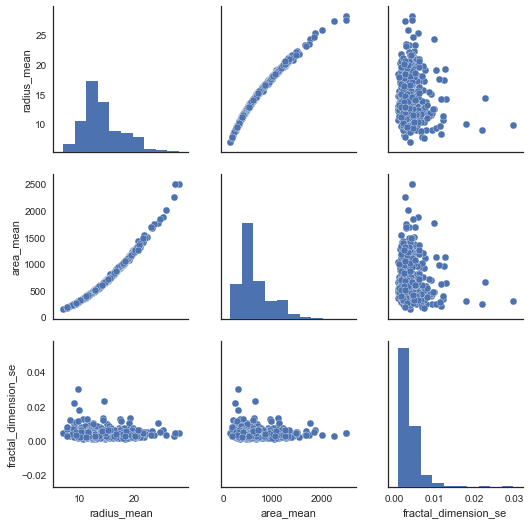

In [80]:
sns.pairplot(df)

We can observe that in scatter plot you can see that when radius_mean increases, area_mean also increases. Therefore, they are positively correlated with each other. There is no correlation between area_mean and fractal_dimension_se. Because when area mean changes, fractal_dimension_se is not affected by chance of area_mean.

We can verify this finding using a **Corelation Heatmap**

Text(0.5,1,'Correlation Heat Map')

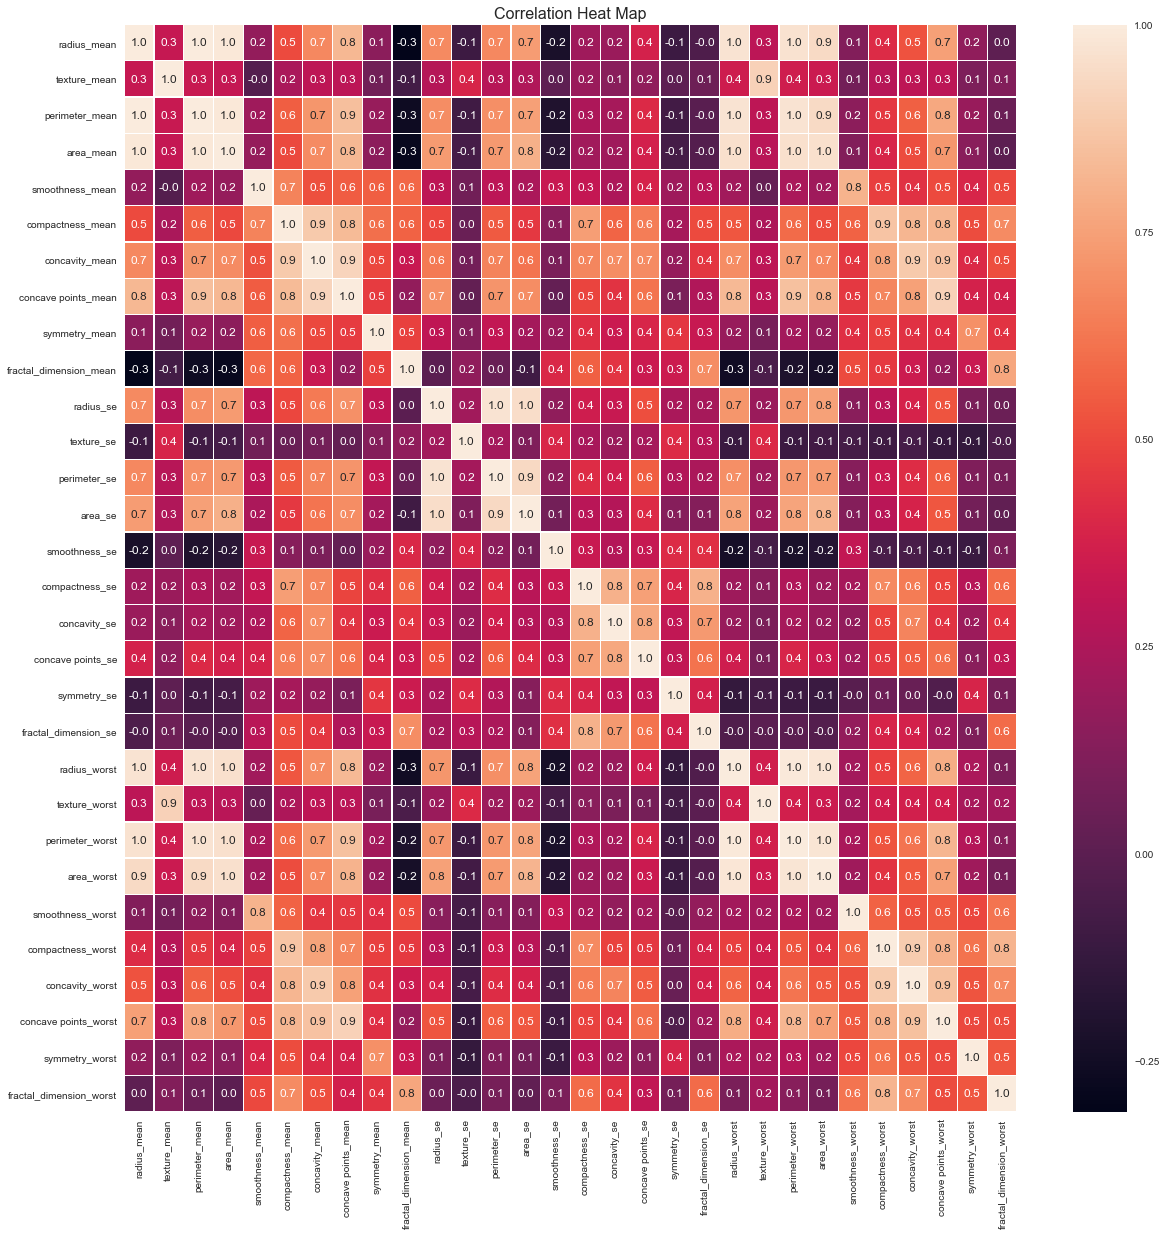

In [82]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=0.3, fmt='0.1f', ax=ax)
plt.title('Correlation Heat Map', fontsize=16)

Correlations range from {-1, 1} showing postive and negative correlation, ones close to zero are not correlated at all.

## Covariance
Covariance is measure of the tendency of two variables to vary together. So covariance is maximized if two vectors are identical.
Covariance is zero if they are orthogonal. Covariance is negative if they point in opposite direction.

Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se

In [84]:
np.cov(data.radius_mean, data.area_mean)
print('Covariance between radius_mean and area_mean: ', data.radius_mean.cov(data.area_mean))
print('Covariance between radius_mean and fractal_dimension_se: ', data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius_mean and area_mean:  1224.483409346457
Covariance between radius_mean and fractal_dimension_se:  -0.00039762485764406293


## Pearson Correlation
Pearson Correlation is nothing but `covariance/standard_deviation` of varaibles. lets look at radius_mean and area_mean. We can do this in many ways.

In [87]:
pearson_coef, p_value = stats.pearsonr(x=data.radius_mean, y=data.area_mean)
print('Pearson Coefficient is: {:.4f} and with a p_value of: {}'.format(pearson_coef, p_value))

Pearson Coefficient is: 0.9874 with a p_value of: 0.0


## Hypothesis Testing
P_value here determines the confidence in the correlation, if p_value:
- p < 0.001 strongly certain about the result
- p < 0.05 moderate certainity
- p < 0.1 < weak certainity
- p > 0.1 No certainity in the result obtained.

This is the third step of the **Classical Hypothesis Testing** where second is a *Null Hypothesis* and trying to disprove it and first is to quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.

## Spearman's Rank Correlation
Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers.So, we depend on other correlation statistics like Spearman's Rank. To compute spearman's correlation we need to compute rank of each value.

In [88]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:, ['area_mean', 'radius_mean']].corr(method='pearson')
print("Spearmann's Correlation: ", spearman_corr)

Spearmann's Correlation:               area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


Spearman's correlation is little higher than pearson correlation if relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship. Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

## Normal(Gaussian) Distribution and Z-Score
Famously called the *bell-shaped distribution* or *Central Limit Theorem*. Checking `skewness` or `kurtosis` in the data using histograms is a good way to see if the data is normally distributed or not. We want our data to be normally distributed to avoid irregular results of our predictions.

To normalize the data we can perform transforamtione like log-trans, box-cox etc.